In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_timeline(t_max, dt):
    return np.arange(0, t_max, dt)

In [3]:
def initialize_arrays(t,initial_values) :
    
    n = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    i_k = np.zeros(len(t))
    i_na = np.zeros(len(t))
    i_leak = np.zeros(len(t))
    v = np.zeros(len(t))
    
    n[0] = initial_values['n0']
    m[0] = initial_values['m0']
    h[0] = initial_values['h0']
    v[0] = initial_values['v0']

    return n, m, h, i_k, i_na, i_leak, v

In [4]:
def alpha_n(v) :
    return 0.01*(v + 55)/(1 - np.exp(-0.1 * (v + 55)))

In [5]:
def beta_n(v) :
    return 0.125 * np.exp(-0.0125 * (v + 65))

In [6]:
def alpha_m(v) :
    return 0.1*(v + 40)/(1 - np.exp(-0.1 * (v + 40)))

In [7]:
def beta_m(v) :
    return 4 * np.exp(-0.0556 * (v + 65))

In [8]:
def alpha_h(v) :
    return 0.07 * np.exp(-0.05 * (v + 65))

In [9]:
def beta_h(v) :
    return 1/(1 + np.exp(-0.1 * (v + 35)))

In [10]:
def open_close_ion_channel_probability(alpha_func, beta_func, v, x) :
    return alpha_func(v)*(1-x) - beta_func(v)*x

In [11]:
# def sodium_current(v, m, h, e_na=50, conductance=120e-9):
#     return conductance*(m**3)*h*(v - e_na) *1e-3
# Seimens = 

def sodium_current(v, m, h) :
    g_na = 120 #S
    e_na = 50 #mV
    return g_na * np.power(m,3) * h * (v - e_na)

In [12]:
# def potassium_current(v, n, e_k=-77, conductance=36e-9):#v in mV
#     return conductance * (n**4) * (v - e_k) *1e-3
def potassium_current(v, n) :
    g_k = 36 #S
    e_k = -77  #mV
    return g_k * np.power(n,4) * (v - e_k)

In [13]:
# def leak_current(v, e_leak=-54.387, conductance=0.3e-9):
#     return conductance*(v - e_leak)*1e-3
def leak_current(v) :
    g_leak = 0.3 #S
    e_leak =-54.387 #mV
    return g_leak * (v - e_leak)

In [14]:
# def hodgkin_huxley_model(v, i_na, i_k, i_leak, i_e, cm):
#     return (-i_na - i_k - i_leak + i_e) / cm

def hodgkin_huxley_model(v, i_k, i_na, i_leak, i_e, c_m) :
    i = (- i_na - i_k - i_leak + i_e)*1e-9 # in nA
    potential = (- i_na - i_k - i_leak + i_e)/c_m # in volt/sec = mV/ms
    return potential # in mV/ms

In [15]:
def exp_applied_current(ie, is_Ie_time_dep, is_Ie_ext, t) :

    i_e = np.zeros(len(t))
    if is_Ie_time_dep : 
        i_e.fill(ie)
#         idx_triggered = (t > params['t_trigger'])
#         ie[idx_triggered] = params['ie']
#         ie[~idx_triggered] = params['ie_pt'] 
    elif is_Ie_ext :
        i_e.fill(ie)
#         ie = params['ie_func']
    else:
        i_e.fill(ie)
    #     ie = np.zeros_like(t)
#     if params['is_ie_time_dependent']:        
#         idx_triggered = (t > params['t_trigger'])
#         ie[idx_triggered] = params['ie']
#         ie[~idx_triggered] = params['ie_pt'] 
#     elif params['is_ie_external']:
#         ie = params['ie_func']
#     else:
#         ie.fill(params['ie'])
        
    return i_e

In [16]:
def euler(params, init_values, t_max, dt):
    
    t = get_timeline(t_max, dt);
    n, m, h, i_k, i_na, i_leak, v = initialize_arrays(t,initial_values);
    
    ie = exp_applied_current(params['ie'], params['is_Ie_time_dep'], params['is_Ie_ext'], t)
    
    for i in range(len(t)-1): 
        n[i+1] = n[i] + dt *  open_close_ion_channel_probability(alpha_n, beta_n, v[i], n[i])
        m[i+1] = m[i] + dt *  open_close_ion_channel_probability(alpha_m, beta_m, v[i], m[i])
        h[i+1] = h[i] + dt *  open_close_ion_channel_probability(alpha_h, beta_h, v[i], h[i])
        
        i_na[i+1] = sodium_current(v[i], m[i], h[i])
        i_k[i+1] = potassium_current(v[i], n[i])
        i_leak[i+1] = leak_current(v[i]) 
        
        v[i+1] = v[i] + dt * hodgkin_huxley_model(v[i], i_na[i+1], i_k[i+1], i_leak[i+1], ie[i], params['c_m'])
    
    return n, m, h, i_k, i_na, i_leak, v, t

In [17]:
dt =1e-2
t_max = 50

initial_values = {
    'v0' : -65,
    'n0' : 0.3177,
    'm0' : 0.0529,
    'h0' : 0.5961
}


params = {
    'ie' : 0,
    'is_Ie_time_dep' :  False,
    'is_Ie_ext' : False,
    'c_m' : 1e-12
}


n, m, h, i_k, i_na, i_leak, v, t = euler(params, initial_values, t_max, dt)

<ipython-input-4-231a137a3554>:2: RuntimeWarning: overflow encountered in exp
  return 0.01*(v + 55)/(1 - np.exp(-0.1 * (v + 55)))
<ipython-input-10-2dbe03621be2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return alpha_func(v)*(1-x) - beta_func(v)*x
<ipython-input-14-757ee5ada6b8>:5: RuntimeWarning: invalid value encountered in double_scalars
  i = (- i_na - i_k - i_leak + i_e)*1e-9 # in nA
<ipython-input-14-757ee5ada6b8>:6: RuntimeWarning: invalid value encountered in double_scalars
  potential = (- i_na - i_k - i_leak + i_e)/c_m # in volt/sec = mV/ms


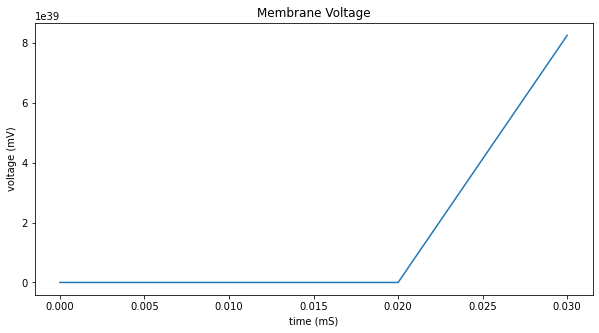

In [18]:
plt.figure(figsize=(10,5))

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title('Membrane Voltage')
plt.plot(t,v)
plt.xlabel('time (mS)')
plt.ylabel('voltage (mV)')
plt.show()
